# Clustering

In these proyect, I'm going to present different clustering algorithm to evaluate and compare its results.

In [1]:
import numpy as np 
import pandas as pd 

In [106]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import mixture


In [69]:
from sklearn.metrics.cluster import adjusted_rand_score

# Exploratory  variable analisys

In [13]:
# Read the data file
data = pd.read_csv('./data_cluster.csv')
data = data.drop(['Unnamed: 32'], axis=1)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Data types are almost correct, only 'diagnosis' should be change to categorical.

With the numerical variables a correlation approach it is going to be made.

In [17]:
df2 =  data.drop(['id','diagnosis'], axis=1)

In [18]:
df2.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [20]:
df = data.drop(['perimeter_mean','area_mean', 'concave points_mean', 'perimeter_worst', 'concave points_worst',
               'area_worst', 'perimeter_se', 'concave points_se', 'area_se', 'id' ], axis = 1)

In [22]:
df.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,...,concavity_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.181162,0.062798,0.405172,1.216853,0.007041,...,0.031894,0.020542,0.003795,16.269190,25.677223,0.132369,0.254265,0.272188,0.290076,0.083946
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.027414,0.007060,0.277313,0.551648,0.003003,...,0.030186,0.008266,0.002646,4.833242,6.146258,0.022832,0.157336,0.208624,0.061867,0.018061
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.106000,0.049960,0.111500,0.360200,0.001713,...,0.000000,0.007882,0.000895,7.930000,12.020000,0.071170,0.027290,0.000000,0.156500,0.055040
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.161900,0.057700,0.232400,0.833900,0.005169,...,0.015090,0.015160,0.002248,13.010000,21.080000,0.116600,0.147200,0.114500,0.250400,0.071460
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.179200,0.061540,0.324200,1.108000,0.006380,...,0.025890,0.018730,0.003187,14.970000,25.410000,0.131300,0.211900,0.226700,0.282200,0.080040
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.195700,0.066120,0.478900,1.474000,0.008146,...,0.042050,0.023480,0.004558,18.790000,29.720000,0.146000,0.339100,0.382900,0.317900,0.092080
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.304000,0.097440,2.873000,4.885000,0.031130,...,0.396000,0.078950,0.029840,36.040000,49.540000,0.222600,1.058000,1.252000,0.663800,0.207500


Numeric varaibles are filter to avoid correlations problems.

In [26]:
df_dummies = pd.get_dummies(df['diagnosis'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([df, df_dummies], axis=1)
df_final = df_new.

In [29]:
df_final = df_new.drop(['diagnosis'], axis = 1)

In [52]:
d = df_final.corr().values[-1]

Correlation between variables and the output variable. If abs(value) is lower than 0.4, this variable will be not taken into account.

In [54]:
d

array([-0.73002851, -0.4151853 , -0.35855997, -0.59653368, -0.69635971,
       -0.33049855,  0.0128376 , -0.56713382,  0.00830333,  0.06701601,
       -0.29299924, -0.25372977,  0.00652176, -0.07797242, -0.77645378,
       -0.45690282, -0.42146486, -0.59099824, -0.65961021, -0.41629431,
       -0.32387219,  1.        ])

In [59]:
df_final.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst', 'B'],
      dtype='object')

In [62]:
df_final = df_new.drop(['smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean',
      'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'diagnosis'], axis = 1)

In [63]:
df_final

,radius_mean,texture_mean,compactness_mean,concavity_mean,radius_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,B
0,17.990,10.38,0.27760,0.300100,1.0950,25.380,17.33,0.16220,0.66560,0.71190,0.4601,0.11890,0
1,20.570,17.77,0.07864,0.086900,0.5435,24.990,23.41,0.12380,0.18660,0.24160,0.2750,0.08902,0
2,19.690,21.25,0.15990,0.197400,0.7456,23.570,25.53,0.14440,0.42450,0.45040,0.3613,0.08758,0
3,11.420,20.38,0.28390,0.241400,0.4956,14.910,26.50,0.20980,0.86630,0.68690,0.6638,0.17300,0
4,20.290,14.34,0.13280,0.198000,0.7572,22.540,16.67,0.13740,0.20500,0.40000,0.2364,0.07678,0
5,12.450,15.70,0.17000,0.157800,0.3345,15.470,23.75,0.17910,0.52490,0.53550,0.3985,0.12440,0
6,18.250,19.98,0.10900,0.112700,0.4467,22.880,27.66,0.14420,0.25760,0.37840,0.3063,0.08368,0
7,13.710,20.83,0.16450,0.093660,0.5835,17.060,28.14,0.16540,0.36820,0.26780,0.3196,0.11510,0
8,13.000,21.82,0.19320,0.185900,0.3063,15.490,30.73,0.17030,0.54010,0.53900,0.4378,0.10720,0
9,12.460,24.04,0.23960,0.227300,0.2976,15.090,40.68,0.18530,1.05800,1.10500,0.4366,0.20750,0


In [115]:
X_train = df_final.drop(['B'], axis = 1)

In [116]:
y = df_final['B'].tolist()

## K-means

In [171]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

In [172]:
kmeans.labels_

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [173]:
adjusted_rand_score( kmeans.labels_, y)

0.485088330323771

In [174]:
X_train2 = df_new.drop(['diagnosis','B'], axis = 1)

In [96]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train2)

In [97]:
adjusted_rand_score( kmeans.labels_, y)

0.485088330323771

In [98]:
X_train2 = X_train.drop(['radius_mean'], axis = 1)

In [99]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train2)

In [100]:
adjusted_rand_score( kmeans.labels_, y)

0.3962675358611261

## Mean shift

In [297]:
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=100)

In [298]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_train)

In [299]:
labels_ms = ms.labels_

In [301]:
labels_ms

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 3, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [302]:
adjusted_rand_score(labels_ms, y)

0.08005882901848461

## Agglomerative clustering

In [307]:
from sklearn.metrics import pairwise_distances

In [308]:
metric ="cosine"

In [309]:
model = AgglomerativeClustering(n_clusters=2,
                                    linkage="average", affinity=metric)

In [310]:
model.fit(X_train)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=2,
            pooling_func=<function mean at 0x000001B09D20C8C8>)

In [311]:
labels_agg = model.labels_

In [312]:
labels_agg

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,

In [313]:
adjusted_rand_score(labels_agg, y)

0.12392084401086143

# DBSCAN 

In [316]:
db = DBSCAN(eps=1, min_samples=2).fit(X_train)

In [317]:
labels_db = db.labels_

In [318]:
labels_db

array([-1,  0, -1, -1, -1, -1, -1,  1,  2, -1, -1,  3, -1, -1,  4, -1, -1,
       -1, -1, -1,  5,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        3, -1,  2,  7, -1,  8,  2, -1, -1,  1,  2, -1, -1, -1,  9,  4, 10,
       11, 12, -1, -1, 12, -1, -1, 13, -1, -1, -1, -1, -1, -1, -1, 14, 12,
       -1,  5, -1, -1, -1, -1, 11, -1, -1, -1, -1, 15, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, 16, -1, -1, -1, 17, -1, -1, 12, 18, -1, 19, 20, -1,
       -1, 18, 21, -1, -1, 22, -1, 23, 24, -1, -1, 25, -1, 10, 26, -1, -1,
       -1, -1, -1, -1, -1, 11, 15, 20, -1, -1, -1, 27, -1, -1, -1, 28, -1,
       15, 29, -1, 30, -1, -1, 15, 11, 29, 31, -1, 32, -1, -1, -1, -1, -1,
       30,  5, 15, 33, -1, 27, -1, -1, -1, -1, 34, -1, 32, -1, -1, -1, 35,
       36, -1, -1, -1, 29, -1, 37, -1, 34, 36, -1, -1, -1, 38, -1, 29, -1,
       12, 15,  5, -1, -1, -1, -1, 39, 11, -1, -1, -1, -1, -1, -1, -1, -1,
       15, -1, 40, -1, 34, -1, -1, 15, -1, -1, -1, -1, 22, 37, -1, -1, 27,
       27, 40, 41, 15, 42

In [319]:
adjusted_rand_score(labels_db, y)

-0.0274070229853252

# Mixture

In [322]:
from sklearn.mixture import GaussianMixture 

In [323]:
gmm = GaussianMixture (n_components=2).fit(X_train)

In [324]:
labels_gausian = gmm.predict(X)

In [325]:
labels_gausian

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [326]:
adjusted_rand_score(labels_gausian, y)

0.7132563550220793

# Visualization

Due to dimensionality reduction tecniques as t-SNE, it is posible to visualize in two dimensions higly data set.

In [280]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [270]:
X_emb= TSNE(n_components=2).fit_transform(X_train)

In [287]:
x_coords = X_emb[:, 0]
y_coords = X_emb[:, 1]

### Real plot

In [290]:
plt.scatter(x_coords, y_coords, c = y)

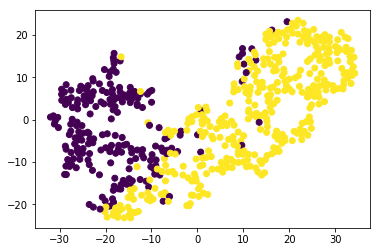

In [291]:
plt.show()

### K-means plot

In [295]:
plt.scatter(x_coords, y_coords, c = kmeans.labels_)

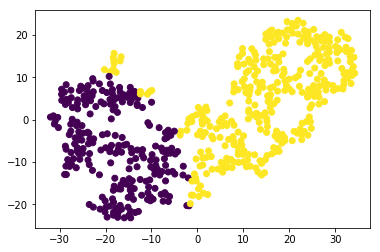

In [296]:
plt.show()

### Mean shift plot

In [305]:
plt.scatter(x_coords, y_coords, c = labels_ms)

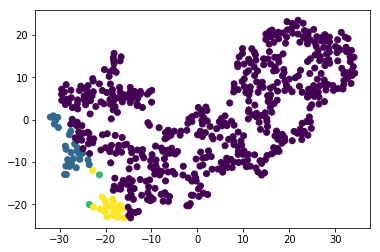

In [306]:
plt.show()

## Agglomerative plot

In [314]:
plt.scatter(x_coords, y_coords, c = labels_agg)

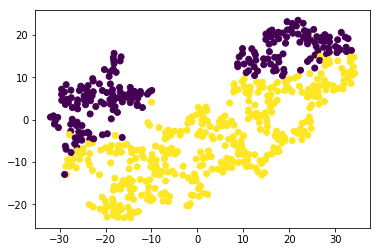

In [315]:
plt.show()

### DBSACN plot

In [320]:
plt.scatter(x_coords, y_coords, c = labels_db)

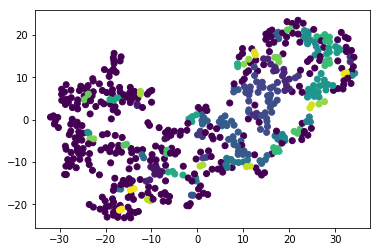

In [321]:
plt.show()

### Mixture gaussian plot

In [327]:
plt.scatter(x_coords, y_coords, c = labels_gausian)

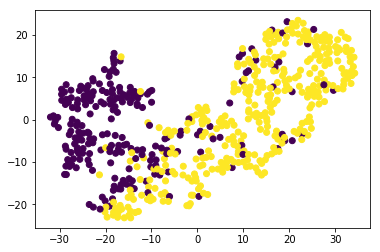

In [328]:
plt.show()